In [1]:
import torch

## Getting started

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3, 4)

tensor([[-0.8851, -1.1192, -0.1673, -3.3143],
        [-0.2828, -0.4136,  1.4181,  0.8793],
        [ 0.9283,  0.2091,  1.6707,  0.3376]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Indexing and Slicing

In [10]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [11]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [12]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Operations

In [13]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [15]:
X.reshape(-1, 3), X

(tensor([[12., 12., 12.],
         [12., 12., 12.],
         [12., 12.,  8.],
         [ 9., 10., 11.]]),
 tensor([[12., 12., 12., 12.],
         [12., 12., 12., 12.],
         [ 8.,  9., 10., 11.]]))

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [18]:
X.sum()

tensor(66.)

## Broadcasting

Broadcasting works according to the following two-step procedure: (i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape; (ii) perform an elementwise operation on the resulting arrays.

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [20]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Saving Memory

In [21]:
# Python point Y to another location after dereferencing it
before = id(Y)
Y = Y + X
id(Y) == before

False

### In place operations
to perform in place operations we can overwrite the values of the tensor and replace them with the new value using slicing notation.

In [22]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2072845416752
id(Z): 2072845416752


In [23]:
before = id(X)
X += Y
id(X) == before

True

## Conversion to Other Python Objects

In [24]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# Data Preprocessing

## Reading the Dataset

In [26]:
import pandas as pd

data_file = 'data/house_tiny.csv'
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


## Data Preparation

In [27]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [28]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [29]:
targets

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

## Conversion to Tensors

In [30]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

# Linear Algebra

## Matrices

In [31]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [32]:
# Transpose
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [33]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A,A == A.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

## Tensors

 We denote general tensors by capital letters with a special font face (e.g., 
X, Y, and Z ) and their indexing mechanism (e.g.,$x_{ijk}$ and [X]$_{1,2i-1,3}$
) follows naturally from that of matrices.

In [34]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## Basic Properties of Tensor Arithmetic

### elementwise operations

In [35]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [36]:
# Hadamard product(elementwise product)
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [37]:
# Scalar by tensor operation
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## Reduction

In [38]:
# summing elements
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [39]:
A[:] = 1+A

### 1. Summing Over All Elements of a Tensor

In [40]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(21.))

### 2. Summing Along Specific Axes

we can specify the axis along which the sum will be computed

In [41]:
# Axis 0 : Summing along axis 0 collapses the rows, resulting in a tensor with one less dimension (the row dimension is removed).

A.shape, A.sum(axis=0).shape

# A.sum(axis=0) sums along the rows:
# Row 1: [1, 2, 3]
# Row 2: [4, 5, 6]
# Result: [1+4, 2+5, 3+6] = [5, 7, 9]
# The output shape is (3,) because the row dimension is collapsed.

(torch.Size([2, 3]), torch.Size([3]))

In [42]:
# Axis 1 : Summing along axis 1 collapses the columns, resulting in a tensor with one less dimension (the column dimension is removed).

A.shape, A.sum(axis=1).shape

# A.sum(axis=1) sums along the columns:
# Column 1: [1, 4]
# Column 2: [2, 5]
# Column 3: [3, 6]
# Result: [1+2+3, 4+5+6] = [6, 15]
# The output shape is (2,) because the column dimension is collapsed.

(torch.Size([2, 3]), torch.Size([2]))

### 3. Summing Along Multiple Axes

You can also sum along multiple axes simultaneously by passing a list of axes to the .sum() function. This is equivalent to summing all elements of the tensor.

In [43]:
A.sum(axis=[0, 1]) == A.sum()  # Sum along both rows and columns

tensor(True)

## Non-Reduction Sum

In [44]:
A

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [45]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 6.],
         [15.]]),
 torch.Size([2, 1]))

## Dot Products

In [46]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

## Matrix–Vector Products

In [47]:
A,x

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([0., 1., 2.]))

In [48]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 8., 17.]), tensor([ 8., 17.]))

## Matrix–Matrix Multiplication

In [49]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 6.,  6.,  6.,  6.],
         [15., 15., 15., 15.]]),
 tensor([[ 6.,  6.,  6.,  6.],
         [15., 15., 15., 15.]]))

In [50]:
B,A

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 2., 3.],
         [4., 5., 6.]]))

## Norms

In [51]:
# l2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [52]:
# l1 norm
torch.abs(u).sum()

tensor(7.)

# Calculus

In [53]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## Derivatives and Differentiation

In [54]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [55]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


## Visualization Utilities

In [56]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [57]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [58]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [59]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

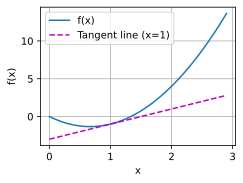

In [60]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial Derivatives and Gradients

To calculate $\frac{\partial y}{\partial x_i}$, 
we can treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants 
and calculate the derivative of $y$ with respect to $x_i$.
The following notational conventions for partial derivatives 
are all common and all mean the same thing:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

We can concatenate partial derivatives 
of a multivariate function 
with respect to all its variables 
to obtain a vector that is called
the *gradient* of the function.
Suppose that the input of function 
$f: \mathbb{R}^n \rightarrow \mathbb{R}$ 
is an $n$-dimensional vector 
$\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ 
and the output is a scalar. 
The gradient of the function $f$ 
with respect to $\mathbf{x}$ 
is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$ 

# Automatic Differentiation

In [61]:
import torch

## A Simple Function

we are interested in differentiating the function $y=2x^Tx$ 
 with respect to the column vector $x$

In [62]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [64]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [65]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [66]:
y.backward()
x.grad # x.grad == 4*x

tensor([ 0.,  4.,  8., 12.])

In [67]:
x.grad == 4 * x

tensor([True, True, True, True])

In [69]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-Scalar Variables

-> The problem with PyTorch is that it can't calculate gradient for non-scalar input, that's why we use the argument `.backward(gradient=...)`

In [76]:
x.grad.zero_() # reset the gradient
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
y, x.grad # x.grad == 2*x

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>), tensor([0., 2., 4., 6.]))

## Detaching Computation

**Key Takeaway**: Detaching creates a "snapshot" of a value, cutting off its history for gradient calculations.

In [80]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [81]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Gradients and Python Control Flow

In deep learning frameworks like PyTorch, automatic differentiation works even when the computational path involves Python control flow (e.g., loops, conditionals). Here’s the key idea:

In [84]:
def f(a):
    b = a * 2
    while b.norm() < 1000:  # Loop depends on input
        b = b * 2
    if b.sum() > 0:          # Branch depends on input
        c = b
    else:
        c = 100 * b
    return c



In [85]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()  # Computes gradient despite dynamic control flow

# Probability and Statistics

In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

Python’s random.random() generates numbers uniformly in the interval [0, 1].

Split the interval [0, 1] into two equal parts:
- Heads: Numbers ≥ 0.5 (probability = 0.5).
- Tails: Numbers < 0.5 (probability = 0.5).

For each "toss", check if random.random() > 0.5. If True, count it as a head; otherwise, a tail.

In [3]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50, 50]


- In this run, 52 heads and 48 tails were observed.
- With a fair coin, the counts should be ≈50-50 for large num_tosses (due to the Law of Large Numbers), but small deviations like this are normal due to randomness.

In [4]:
num_tosses = 100000000
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50003143, 49996857]


we can use the `multinomial` function to simulate multiple draws from any variabl, setting the first argument to the number of draws and the second as a list of probabilities associated with each of the possible outcomes.

In [5]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(10000, fair_probs).sample(), Multinomial(10000, fair_probs).sample()/10000 # frequency of each outcome

(tensor([4970., 5030.]), tensor([0.5011, 0.4989]))

## The law of large numbers

let's see how our estimate outcome evolves as we grow the number of tosses from 1 to 10000

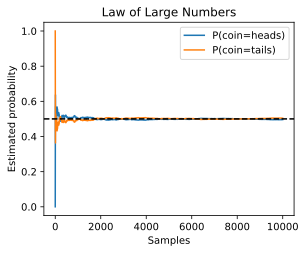

In [7]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.title('Law of Large Numbers')
d2l.plt.legend()
